# KLASIFIKASI PASIEN STROKE

Klasifikasi pasien stroke menggunakan logistic regression algorithm.

## 1. Data Exploration

Import data dan melihat isi dari dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [7]:
df = pd.read_csv("/healthcare-dataset-stroke-data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


12 Kolom dan 5110 Baris:
|Kolom|Arti|
|---|---|
|id|Nomor pasien|
|gender|Jenis kelamin pasien|
|age|Umur pasien|
|hypertension|Penderita hipertensi (darah tinggi), 1 = penderita, 0 = bukan|
|heart_disease|Penderita penyakit jantung, 1 = penderita, 0 = bukan|
|ever_married|Pernah menikah|
|work_type|Tipe pekerja|
|Residence_type|Jenis tempat tinggal|
|avg_glucose_level|Rata-rata gula darah|
|bmi|Nilai BMI pasien|
|smoking_status|Status perokok|
|stroke|Merupakan pasian stroke, 1 = penderita, 0 = bukan|

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


([<matplotlib.patches.Wedge at 0x793f5fc70c70>,
 [Text(-1.0871361453364168, 0.16773491438301516, 'Healthy'),
  Text(1.087136143373357, -0.1677349271061446, 'Stroke')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.13%'),
  Text(0.592983350930922, -0.0914917784215334, '4.87%')])

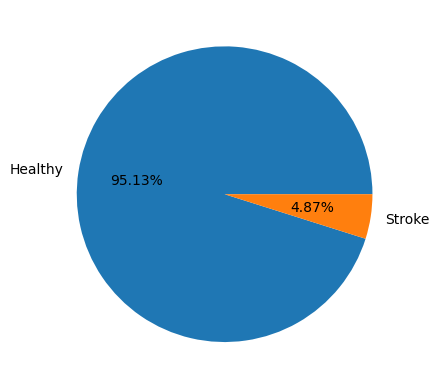

In [11]:
import matplotlib.pyplot as plt

labels = 'Healthy', 'Stroke'
healthy = df['stroke'].value_counts()[0]
stroke = df['stroke'].value_counts()[1]
sizes = [healthy, stroke]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%')

In [12]:
print('Manusia sehat: ', healthy)
print('Manusia stroke: ', stroke)

Manusia sehat:  4861
Manusia stroke:  249


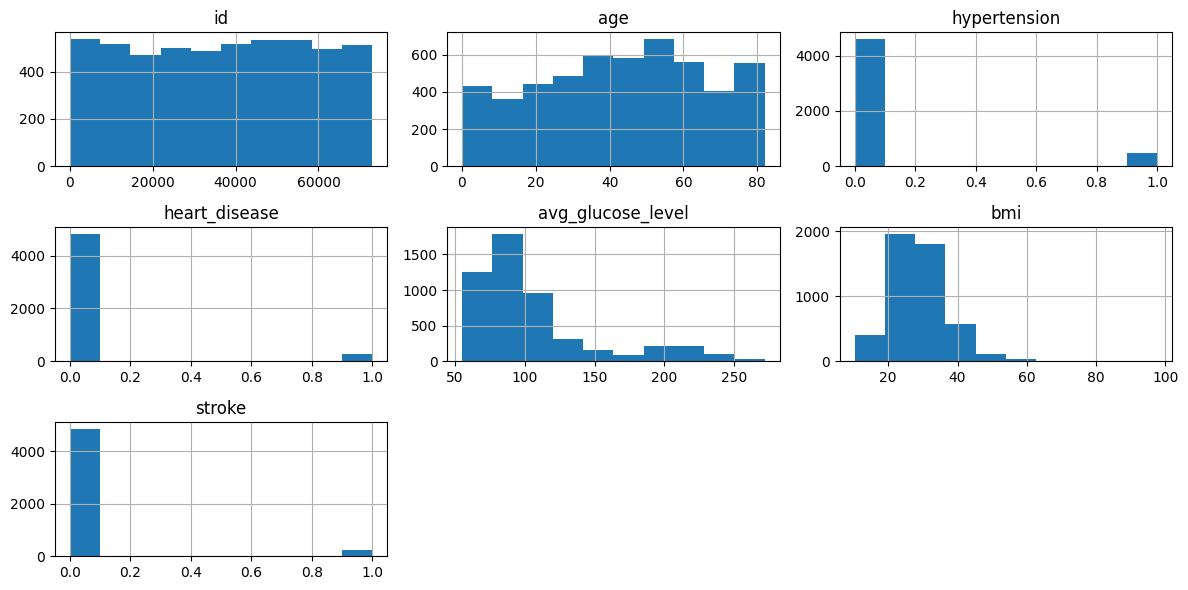

In [13]:
df.hist(figsize=(12,6))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

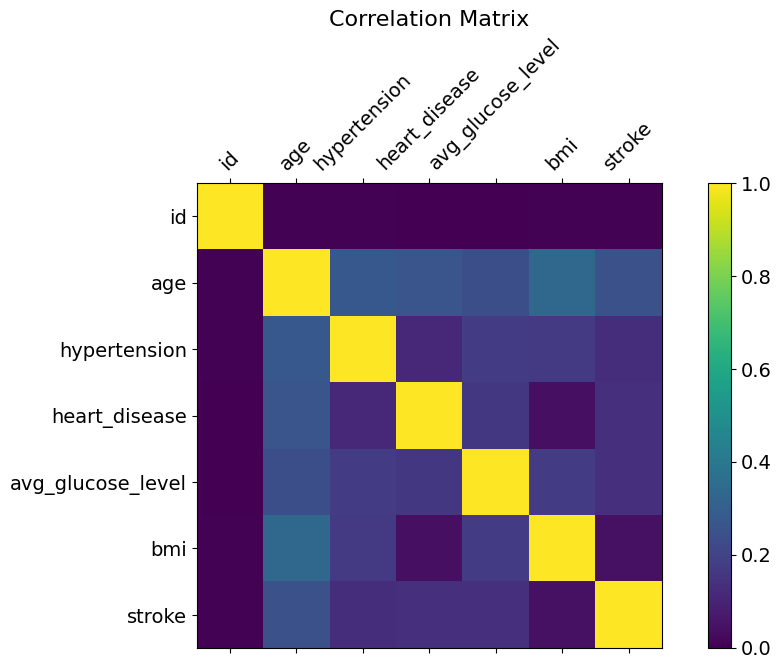

In [14]:
fig= plt.figure(figsize=(12, 6))
plt.matshow(df.corr(numeric_only=True), fignum=fig.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Hasil korelasi hanya menunjukkan bmi yang berkorelasi dengan umur, sisanya memiliki nilai kecil dalam korelasi.

## 2. Data Preprocessing

In [15]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Terdapat nilai kosong sebanyak 201 baris pada bmi.

In [16]:
df.ffill(inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
df_X = df.drop(['id', 'stroke', 'gender', 'hypertension',
                'heart_disease', 'ever_married', 'work_type',
                'Residence_type', 'avg_glucose_level', 'smoking_status'], axis = 1)
df_y = df['stroke']

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [19]:
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(df_y)
y_encoded

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
cats = df_X.select_dtypes(include=['int', 'float']).columns
cat_features = list(cats.values)
cat_features

['age', 'bmi']

In [21]:
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])


X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
X_train

array([[0.75728155, 0.58992806],
       [0.75728155, 0.47002398],
       [0.39805825, 0.73381295],
       ...,
       [0.60194175, 0.51318945],
       [0.50485437, 0.43405276],
       [0.57281553, 0.35971223]])

In [23]:
X_test

array([[0.46601942, 0.69304556],
       [0.63106796, 0.3764988 ],
       [0.89320388, 0.47002398],
       ...,
       [0.96116505, 0.30935252],
       [0.40776699, 0.58033573],
       [0.45631068, 0.58513189]])

In [24]:
y_train

157     1.0
3478    0.0
1268    0.0
1552    0.0
1658    0.0
       ... 
3246    0.0
2589    0.0
3337    0.0
3214    0.0
2916    0.0
Name: stroke, Length: 3832, dtype: float64

In [25]:
y_test

1109    0.0
1653    0.0
2986    0.0
2742    0.0
551     0.0
       ... 
1383    0.0
1       1.0
4451    0.0
920     0.0
3880    0.0
Name: stroke, Length: 1278, dtype: float64

## 3. Data Training and Prediction

In [26]:
#mulai melakukan modelling. model ML learning dari training set
model=LogisticRegression()
model.fit(X_train, y_train)


# membuat prediksi
y_pred = model.predict(X_test)

Accuracy  0.9530516431924883
Precision  0.4765258215962441
Recall  0.5


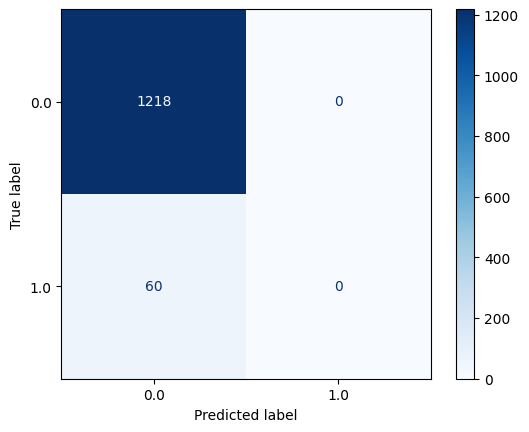

In [27]:
print('Accuracy ', accuracy_score(y_test, y_pred))
print('Precision ', precision_score(y_test, y_pred, average='macro'))
print('Recall ', recall_score(y_test, y_pred, average='macro'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

disp.plot(cmap=plt.cm.Blues)

Hasil kurang memuaskan:

1213 pasien tidak menderita stroke diklasifikasi sehat,

namun 65 pasien penderita stroke diklasifikasi sehat,

kesalahan fatal dalam model klasifikasi.

In [29]:
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients:  [[6.03006208 0.15628576]]
Intercept:  [-7.45103863]


In [32]:
from sklearn.svm import SVC
modelsvc = SVC(kernel="linear")  # try kernel="rbf" instead
modelsvc.fit(X_train, y_train)


# membuat prediksi
y_predsvc = modelsvc.predict(X_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier
modeldtc = DecisionTreeClassifier()
modeldtc.fit(X_train, y_train)
y_preddtc = modeldtc.predict(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier  # Change this to try
                                                    # something else
# Set hyper-parameters, for controlling algorithm
modelknn = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
modelknn.fit(X_train, y_train)
y_preddtc = modelknn.predict(X_test)